## 손씻기의 비극 - t-test 및 분포 

- 오늘 우리는  1818년에 태어나 비엔나 종합병원에서 일했던 헝가리 의사 "이그나츠 젬멜와이스"가 된다. 

<img src="assets/ignaz.png">

- 과거에 사람들은 박테리아, 세균, 바이러스에 대해 몰랐다. 사람들은 "나쁜 공기" 또는 악령 때문에 병에 걸린 것이라고 생각했다. 하지만 1800년대 의사들은 인체를 해부하고 부검한 데이터를 기반으로 주장하기 시작했다. 
- 젬멜와이스는 비엔나 종합병원의 수술에서 뭔가가 잘못되었다고 의심하기 시작했다. 젬말와이스는 왜 그렇게 많은 여성들이 분만실에서 산욕열(산후열이라고도 하며, 산모가 출산 후 첫 24간을 제외한 10일 이내에 이틀 동한 측정한 체온이 38도 이상인 것을 말함)로 목숨을 잃는지 알고 싶어했다. 

### 이번 시간에 Study 할 사항 
- 데이터를 이용해 설득력 있는 주장을 하는 법
- 히스토그램을 첨부해 분포의 차이를 보여주는 방법
- 커널 밀도 추정(KDE)을 이용해 분포 추정치를 그래픽으로 보여주는 방법
- SciPy를 사용하고 p-value를 확인함으로써 통계적 유의성을 시험하는 방법
- Matplotlib에서 시계열 차트의 다른 부분들을 강조하는 방법
- Matplotlib에서 범례를 추가하고 설정하는 방법
- NumPy의 .where() 함수를 사용해 조건에 따라 요소 처리하기

### 1. 데이터 사전 탐구와 비엔나 병원의 출생자, 사망자 수 시각화하기

- 우리(젬멜와이스)는 비엔나 종합병원에서 일하고 있다. 1840년대에 걸쳐 출산 및 산모 사망 횟수에 관해 우리가 수집해 온 데이터를 자세히 살펴보자

<img src="assets/hp_history.png">

#### 1-1. 데이터 탐색 

In [1]:
# 필요한 패키지 불러오기 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import plotly.graph_objects as go 
import plotly.express as px 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기 
df_year = pd.read_csv('data/annual_deaths_by_clinic.csv')
df_monthly = pd.read_csv('data/monthly_deaths.csv')

In [3]:
# 년도 및 데이터 개수 확인
print(f'Year data shape is {df_year.shape}')
print(df_year.head())
print(f'Monthly data shape is {df_monthly.shape}')
print(df_monthly.tail())

Year data shape is (12, 4)
   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1
Monthly data shape is (98, 3)
          date  births  deaths
93  1848-11-01     310       9
94  1848-12-01     373       5
95  1849-01-01     403       9
96  1849-02-01     389      12
97  1849-03-01     406      20


In [4]:
# 데이터 정보 1 - Year Data
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [5]:
# 데이터 정보 2 - Monthly
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [6]:
# 중복 데이터 확인 
print(f'Any yearly duplicates? {df_year.duplicated().values.any()}')
print(f'Any monthly duplicates? {df_monthly.duplicated().values.any()}')

Any yearly duplicates? False
Any monthly duplicates? False


- 1841년에서 1849년 까지를 포함한다는 사실을 알 수 있다. 데이터들은 출산 및 산모 사망의 총횟수를 보여준다. 
- 연 데이터는 출 산 및 산모 사망 횟수를 병동에 따라 나눴다. 
- NaN 값, 중복 값 두 데이터 모두 없다. 

In [7]:
# 통계값 확인 - monthly data 
df_monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [8]:
# 통계값 확인 - year data 
df_year.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


- 각각 두 데이터의 통계 데이터를 살펴 보니 매월 평균적으로 약 267회의 출산과 22.47회의 산모 사망이 있었다는 것을 알 수 있었다.

#### 1-2. 출산 시 사망하는 여성의 비율 

In [9]:
# 출산 시 사망하는 여성 비율 구하기 - (사망수 전체 합 / 출산 수 전체 합) * 100
prob = (df_year.deaths.sum() / df_year.births.sum()) * 100
print(f'Chances of dying in the 1840s in Vienna: {prob: .3}%')

Chances of dying in the 1840s in Vienna:  7.08%


- 1840년대 출산은 매우 위험했습니다. 무려 7.08%의 산모가 사망하는 결과가 나왔습니다. (2013년 미국의 산모 사망률은 0.018% 이다)

#### 1-3. 시간에 따른 출산 및 산모 사망의 총횟수 시각화 

In [36]:
# 시각화 전에 전처리 - date 컬럼을 datetime 형식으로 변환
df_monthly['date'] = pd.to_datetime(df_monthly['date'])

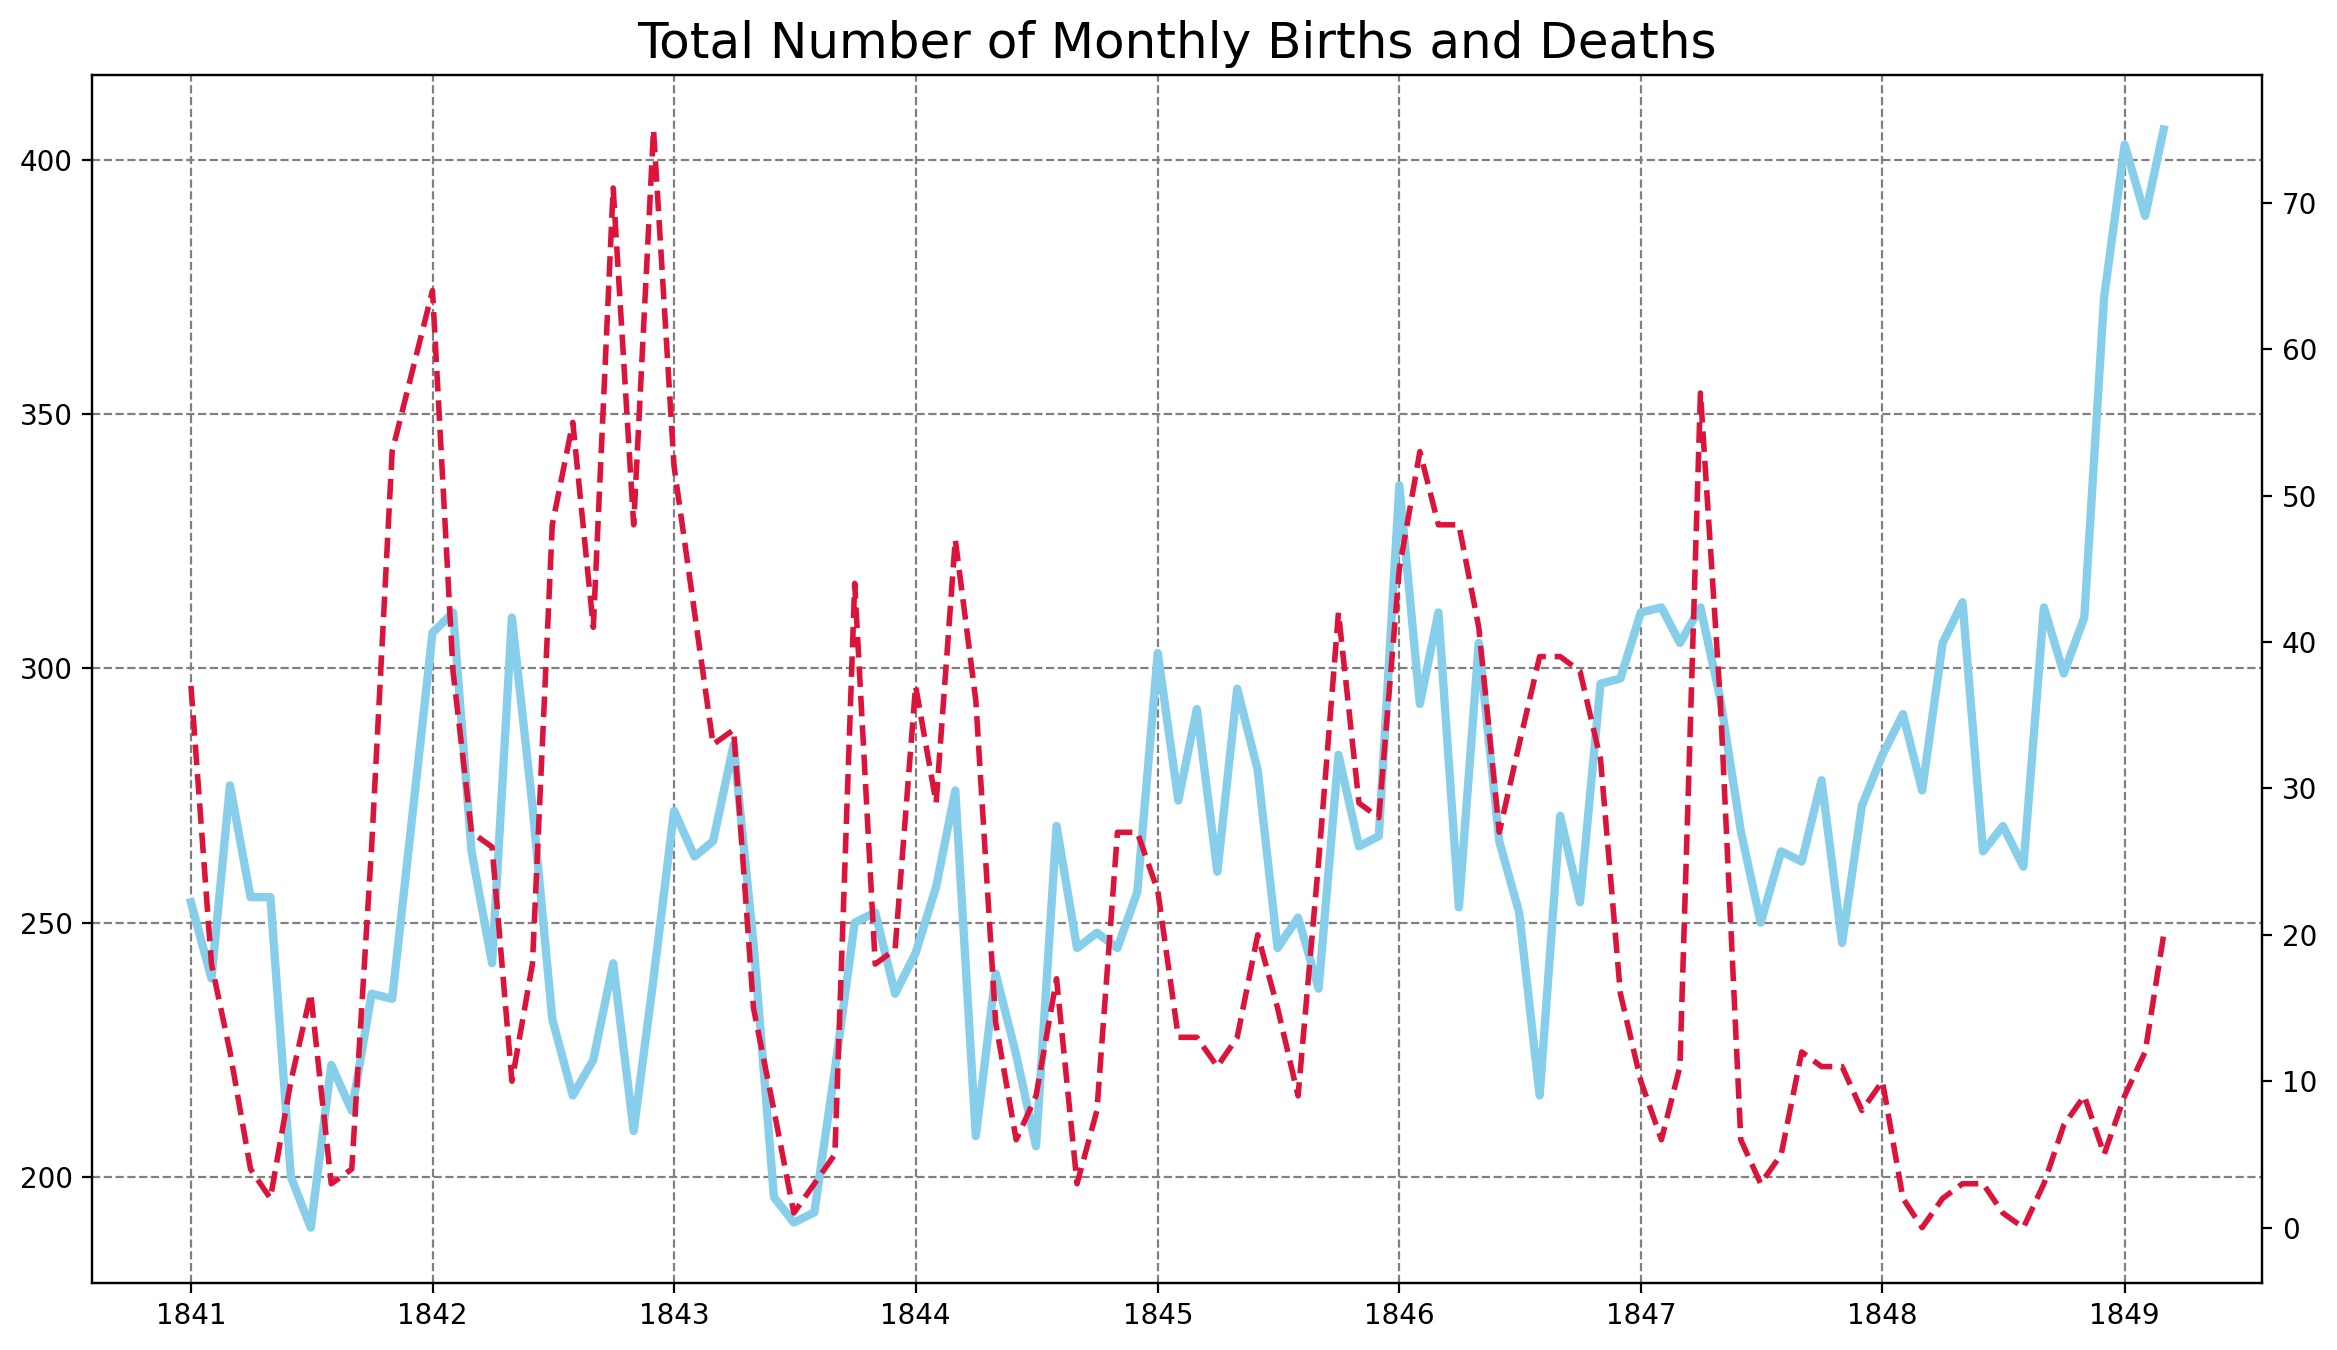

In [37]:
# 데이터 시각화 
plt.figure(figsize=(14,8), dpi=200)                                  # 사이즈와 인치당 도트수 설정
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)  # 타이틀 설정
 
ax1 = plt.gca()                                      # 현재 축 얻고 
ax2 = ax1.twinx()                                    # 동일한 X축을 공유하는 다른 축 생성 
 
ax1.grid(color='grey', linestyle='--')               # 격자 추가

# 차트 생성 및 스타일 추가 
ax1.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.births,                          # 기준 데이터 - 왼쪽 y축 - 산모 출산수 
         color='skyblue',                            # 선 색상 설정
         linewidth=3)                                # 선 두께 설정
 
ax2.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.deaths,                          # 기준 데이터 - 오른쪽 y축 - 산모 사망수
         color='crimson',                            # 선 색상 설정
         linewidth=2,                                # 산 두께 설정 
         linestyle='--')                             # 산 스타일 설정
 
plt.show()

In [26]:
# 년도 기준 설정 - "YearLocator()" 및 "MonthLocator()" 객체 선언 
years = mdate.YearLocator()
months = mdate.MonthLocator()
years_fmt = mdate.DateFormatter('%Y') 

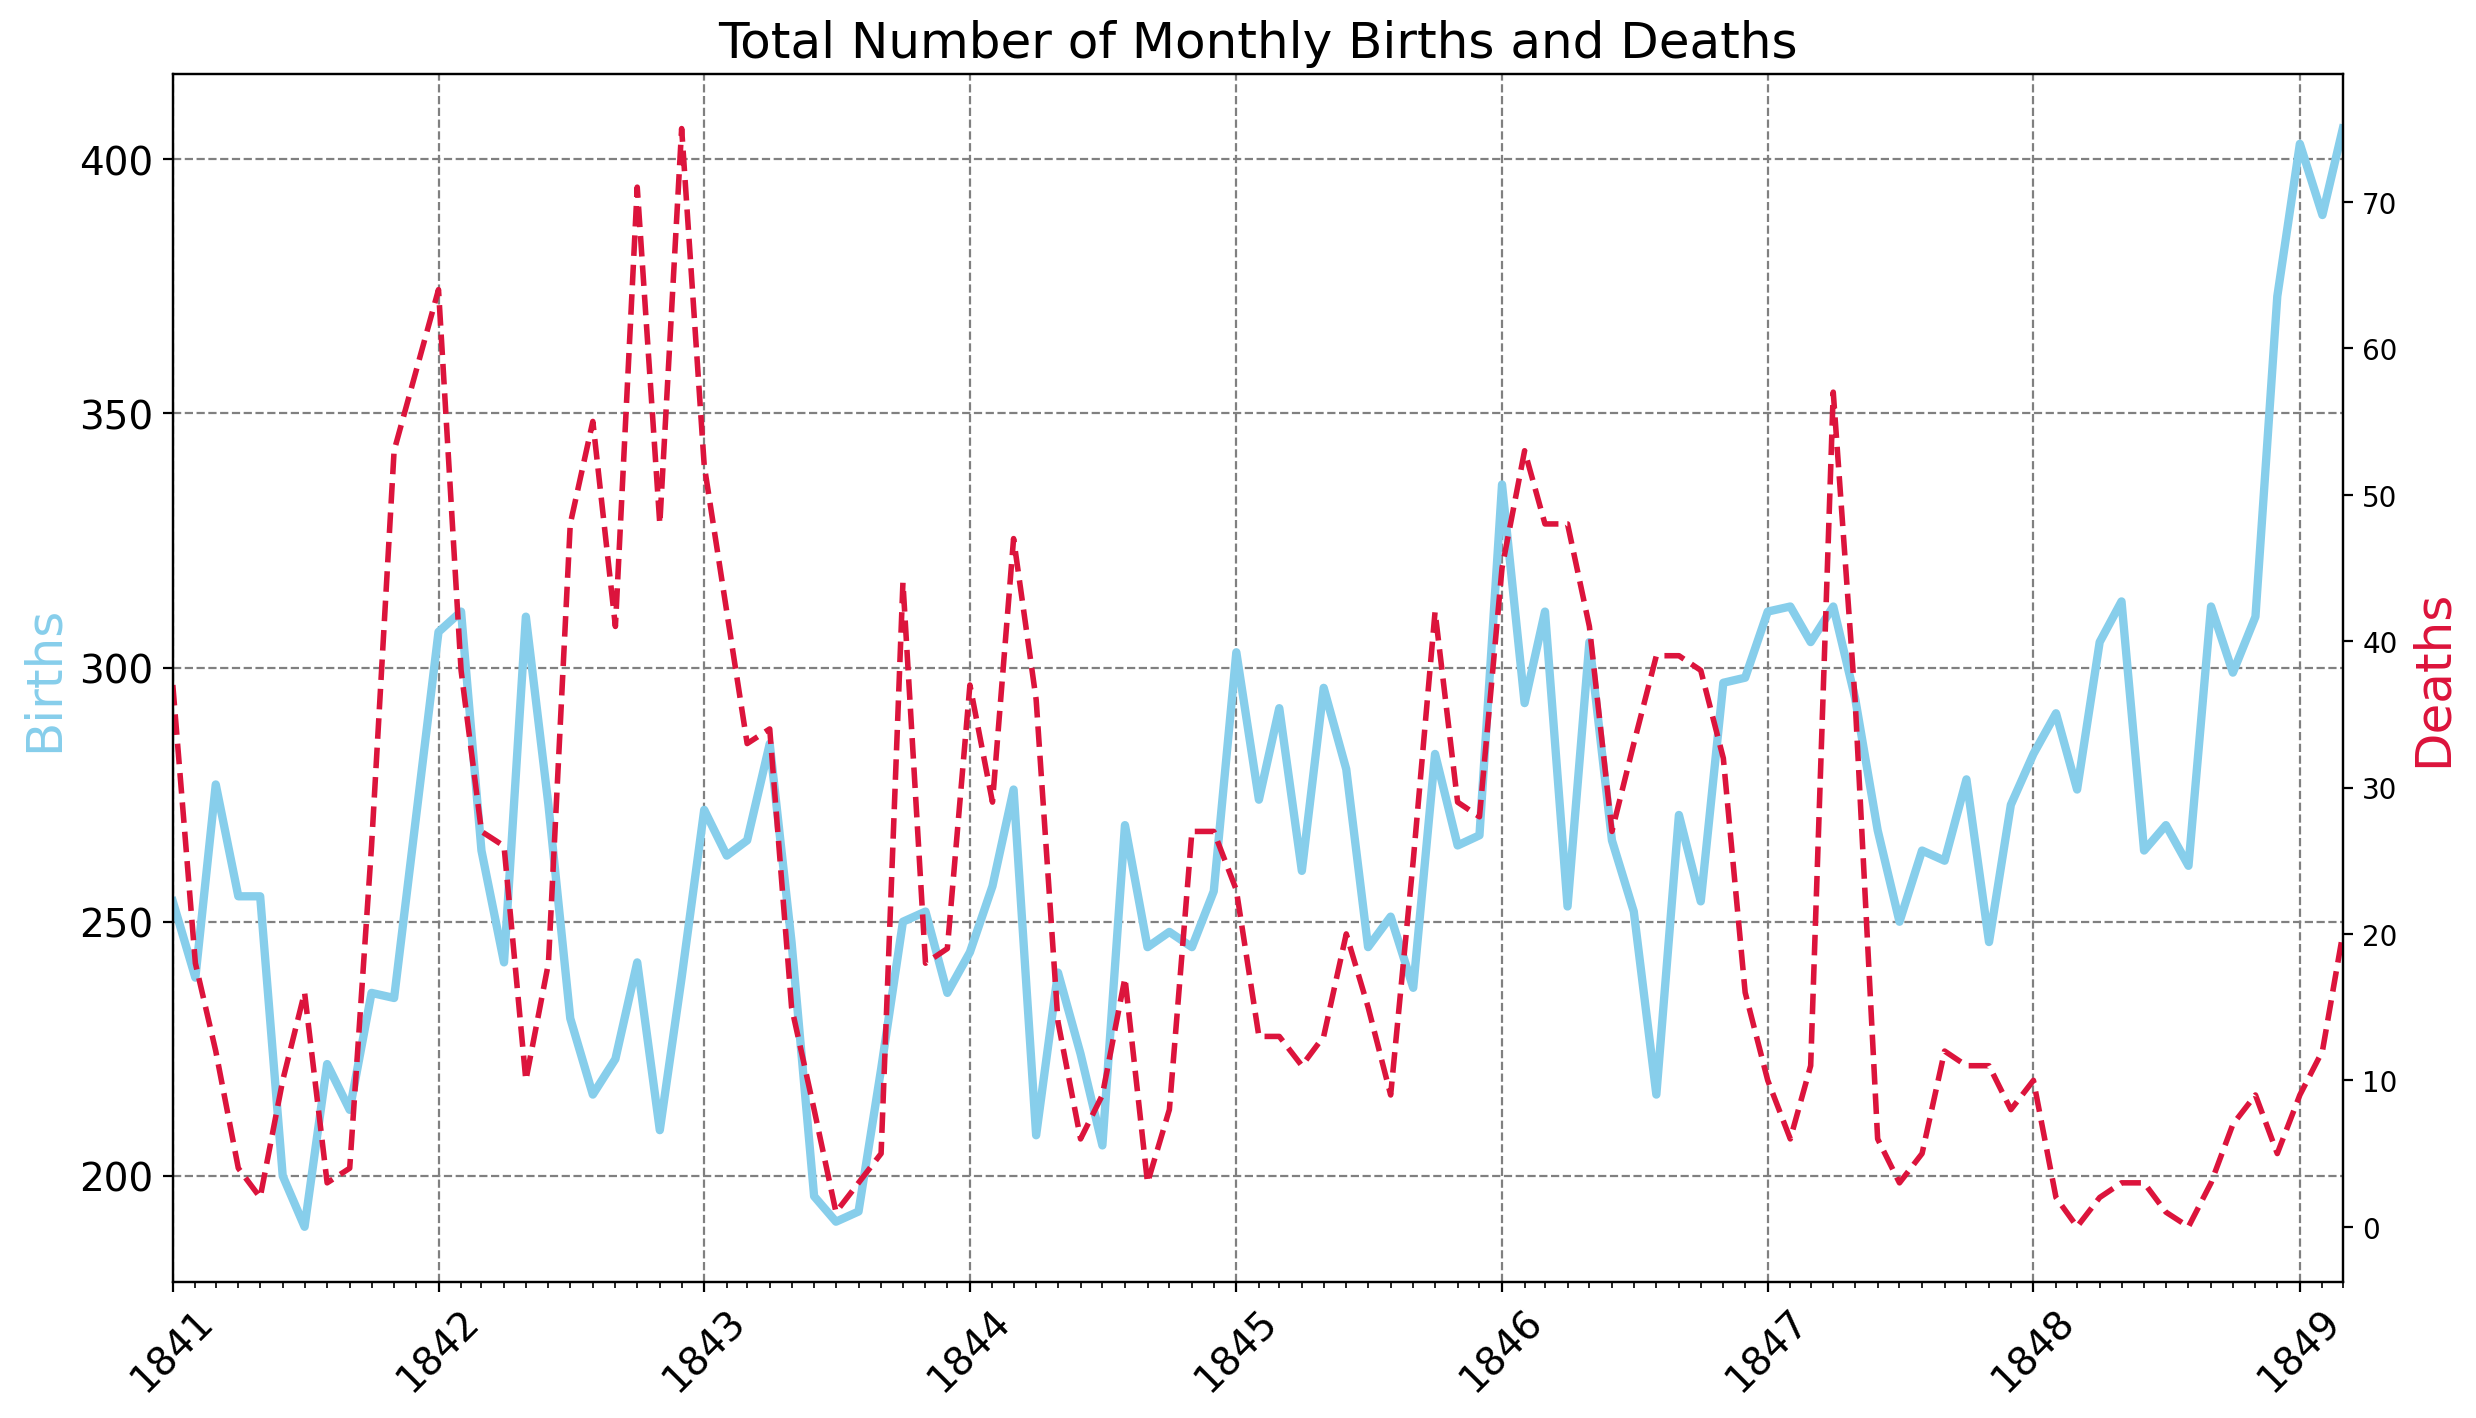

In [40]:
# 데이터 시각화 - 추가 및 수정
plt.figure(figsize=(14,8), dpi=200)                                  # 사이즈와 인치당 도트수 설정
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)  # 타이틀 설정
plt.yticks(fontsize=14)                                              # y축 레이블 크기 설정  
plt.xticks(fontsize=14, rotation=45)                                 # x축 레이블 크기 설정 및 각도 설정 
plt.grid(color='gray', linestyle='--')                               # 격자 설정 

ax1 = plt.gca()                                                      # 현재 축 얻고 
ax2 = ax1.twinx()                                                    # 동일한 X축을 공유하는 다른 축 생성 

# 레이블 추가 
ax1.set_ylabel('Births', color='skyblue', fontsize=18)               # ax1 레이블 설정 
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)               # ax2 레이블 설정 

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])         # x축의 최소값 및 최대값 설정 
ax1.xaxis.set_major_locator(years)                                   # 년도 적용 
ax1.xaxis.set_major_formatter(years_fmt)                             # 년도 지정된 데이터포메터 적용
ax1.xaxis.set_minor_locator(months)                                  # 월 적용

# 차트 생성 및 스타일 추가 
ax1.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.births,                          # 기준 데이터 - 왼쪽 y축 - 산모 출산수 
         color='skyblue',                            # 선 색상 설정
         linewidth=3)                                # 선 두께 설정
 
ax2.plot(df_monthly.date,                            # 기준 데이터 - x축 - 년도 
         df_monthly.deaths,                          # 기준 데이터 - 오른쪽 y축 - 산모 사망수
         color='crimson',                            # 선 색상 설정
         linewidth=2,                                # 산 두께 설정 
         linestyle='--')                             # 산 스타일 설정

plt.show()

- 1847년도 이후 특이한 패턴이 보인다. 출산 횟수가 늘어났음에도 산모 사망 총수는 감소한 것으로 나타났다.